# Podsumowanie podstawowych strategii UM nadzorowanego

Przedstawione dotychczas strategie analizy danych miały dwa podstawowe cele: realizację zadania rozpoznawania obiektów (udzielanie odpowiedzi na pytanie co/kto to jest?) oraz przewidywania (predykcji) wartości procesu lub parametru. Źródłem wiedzy o problemie były etykietowane przykłady, a sposobem rozwiązywania problemu była procedura, w której najpierw przyjmowano model analizy i definiowano sposób jego wykorzystywania, następnie na bazie przykładów treningowych estymowano parametry tego modelu, a po wytrenowaniu - wykorzystywano model do analizy nieznanych wcześniej próbek (przykładów ze zbioru testowego).

Przedstawione strategie analizy zakładały, że podstawą do udzielenia odpowiedzi na zadawane algorytmowi pytanie będzie podobieństwo (różnie rozumiane) poddawanej analizie próbki do modeli klas. Ocena podobieństwa była dokonywana albo poprzez określenie odległości do modelu klasy (metoda k-NN lub GMM), albo przez ocenę p-stwa przynależności do klasy (Bayes), albo przez ocenę przynależności opisu ilościowego próbki (czyli wektora cech) do 'regionu decyzyjnego', czyli obszaru przestrzeni cech uznanego za odpowiadający danej klasie (regresja logistyczna, drzewo decyzyjne). 

Aby wyniki analiz: klasyfikacji lub regresji, były poprawne, konieczne jest zbudowanie odpowiedniego opisu ilościowego obiektów. Ponieważ dla problemów rzeczywistych zbiór cech charakterystycznych dla danej kategorii jest najczęściej nieznany, metoda wyznaczania opisu ilościowego to najpierw, określenie reprezentacji nadmiarowej, zawierającej wiele różnych charakterystyk obiektów, a następnie, przeprowadzenie procesu redukcji tego zbioru (redukcji wymiarowości przestrzeni cech). Prosta koncepcyjnie strategia nadzorowanej redukcji opisu to selekcja cech, gdzie podzbiory cech są oceniane za pomocą odpowiednio zdefiniowanej miary (np. separacji - współczynniki Fishera) i pozostawiane są tylko najlepsze. Dużo częściej stosowaną metodą jest ekstrakcja cech, z których najpopularniejsza jest analiza składowych głównych (PCA).   

Skuteczność przedstawionych metod w konfrontacji z danymi rzeczywistymi jest niewielka, przede wszystkim z uwagi na złożoność rozkładów danych rzeczywistych, trudność zapewnienia właściwego opisu kategorii, nawet z wykorzystaniem zaawansowanych metod ekstrakcji cech, niedostateczną reprezentatywność posiadanego zbioru danych, szum (niedokładności pomiaru cech), stosowanie zbyt uproszczonych modeli kategorii lub brak przesłanek pozwalających na zbudowanie modelu o właściwej złożoności, błędy etykietowania itp.

## Pojemność klasyfikatora 

Jedną z cech wymaganych od modelu budowanego dla potrzeb klasyfikacji obiektów jest umożliwienie prawidłowego odzwierciedlenia złożoności występującej w obrębie kategorii, wyrażającej się skomplikowanymi często kształtami obszarów przestrzeni cech, wypełnianych przez próbki danej kategorii. Aby model mógł poprawnie poradzić sobie z klasyfikacją danych, musi zapewnić odpowiednią elastyczność w dopasowaniu się do wymaganego rozkładu. Oznacza to, posiadanie odpowiedniej złożoności, czyli wielu parametrów, których odpowiednie określenie następuje w procesie uczenia. Zależnie od przyjętej metody analizy, różne są geometryczne interpretacje modeli - może to być sposób wytyczania powierzchni granicznych w przestrzeni cech, może to być kształt modeli skupień lub funkcja użyta do indeksowania punktów przestrzeni prawdopodobieństwami przynależności do różnych klas. Jednym ze sposobów oceny złożoności modeli stoswanych w klasyfikacji jest tzw. pojemność klasyfikatorów, typowo mierzona tzw. wymiarem VC (Vapnika-Czerwonienkisa). Niestety, pomysł zwiększania pojemności klasyfikatora jako reguły prowadzącej do poprawy klasyfikacji nie jest dobry, ponieważ nadmierna złożoność klasyfikatora sprawia, że 'uczy się na pamięć' próbek zbioru treningowego (mając odpowiednio dużo parametrów klasyfikatora zawsze można je dobrać w sposób redujujący błąd klasyfikacji na zbiorze treningowym do zera, ale wcale nie będzie to oznaczać zbudowania prawidłowego modelu kategorii). Jednym z najważeniejszych zadań w uczeniu maszynowym jest zapewnienie właściwej generalizacji wiedzy zawartej w próbkach treningowych, by algorytm działał poprawnie w odniesieniu do nieznanych mu wcześniej danych. 

Poniższe przykłady przedstawiają typowe problemy klasyfikacji danych i pokazują właściwości różnych metod klasyfikacji. Do testowania różnych algorytmów zostały w nich wykorzystane standardowo dostępne sztuczne i rzeczywiste zbiory danych treningowych. Procedura budowy klasyfikatorów z wykorzystaniem modułu sklearn jest zawsze podobna: najpierw dokonywany jest trening klasyfikatora (metoda fit), a później, nauczony klasyfikator dokonuje analizy nieznanych danych (predict).

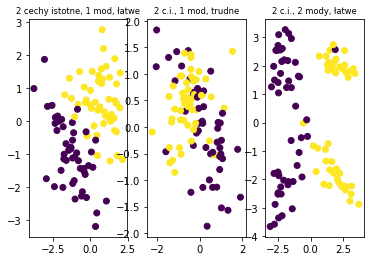

In [14]:
import matplotlib.pyplot as plt
# Funkcja do generacji zbioru przykładów dla celów klasyfikacji
from sklearn.datasets import make_classification
%matplotlib inline

plt.subplot(131)
plt.title("2 cechy istotne, 1 mod, łatwe", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,
                            class_sep = 3, hypercube=False) 
# class_sep - poziom separacji klas, hypercube - usytuowanie centrum klastra (True - narożnik hipersześcianu)
plt.scatter(X1[:, 0], X1[:, 1], c=Y1)

plt.subplot(132)
plt.title("2 c.i., 1 mod, trudne", fontsize='small')
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,
                            class_sep = 2, hypercube=False)
plt.scatter(X2[:, 0], X2[:, 1], c=Y2)

plt.subplot(133)
plt.title("2 c.i., 2 mody, łatwe", fontsize='small')
X3, Y3 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2,
                            class_sep = 2)
plt.scatter(X3[:, 0], X3[:, 1], c=Y3)

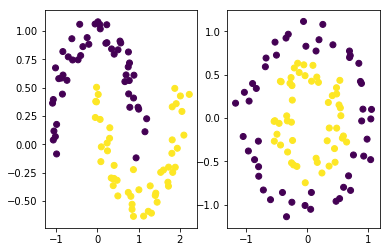

In [27]:
from sklearn.datasets import make_moons, make_circles

plt.subplot(121)
XM, YM = make_moons(noise = 0.1) # noise 0....1 - zaburzenie
plt.scatter(XM[:, 0], XM[:, 1], c=YM)

plt.subplot(122)
XC, YC = make_circles(noise = 0.1, factor=0.5) # factor = wsp między promieniami wewn. i zewn. (0< ... <1)
plt.scatter(XC[:, 0], XC[:, 1], c=YC)

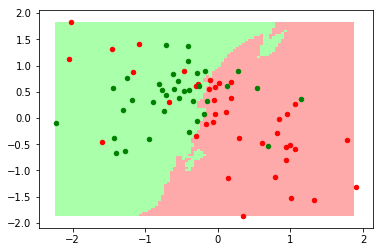

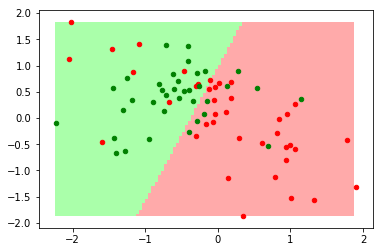

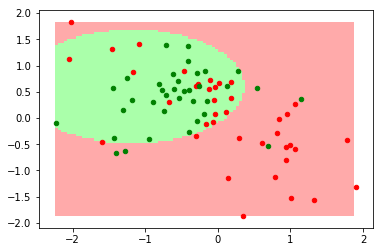

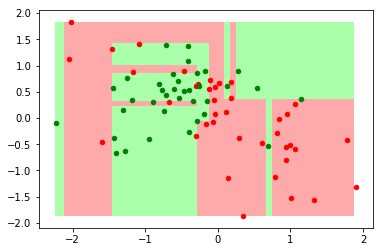

In [37]:
# klasyfikacja wygenerowanych zbiorów z użyciem różnych metod klasyfikacji
# podział na zbiory treningowy i testowy, uczenie klasyfikatora, test
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import numpy as np

def okreslDziedzine(X):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def rysujWynik(x_train, x_test, y_train, y_test, Z):
    plt.figure()
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], c='red',   s=20)
    plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], c='green', s=20)

x_tr, x_tst, y_tr, y_tst = train_test_split(X2,Y2) # domyślny podział: 75% train, 25% test
# określenie dziedziny
xx,yy = okreslDziedzine(X2)
#------------------------------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
k=17
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x_tr,y_tr)
# predykcja wszytkich punktów dziedziny
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
rysujWynik(x_tr, x_tst, y_tr, y_tst, Z)
#------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_tr, y_tr)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
rysujWynik(x_tr, x_tst, y_tr, y_tst, Z)
#------------------------------------------------------------------------------------------
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(x_tr, y_tr)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
rysujWynik(x_tr, x_tst, y_tr, y_tst, Z)
#------------------------------------------------------------------------------------------
from sklearn import tree
clf = tree.DecisionTreeClassifier().fit(x_tr, y_tr)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
rysujWynik(x_tr, x_tst, y_tr, y_tst, Z)